In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Job_Application_Screening.csv')

In [ ]:
df.head()


,Application_ID,Age,Education_Level,Years_of_Experience,Skills,Previous_Job_Experience,Expected_Salary,Job_Level,Location,Application_Status
0,4b896e58-5a91-474d-923f-31d35ec7349f,58,NaN,1.0,JavaScript,No,136183.661534,Lead,Urban,Suitable
1,7bc2ce13-2602-428b-9007-f3cdb7d8d3de,42,High School,22.0,C++,Yes,NaN,Lead,Suburban,Not Suitable
2,ebb94eb8-ba5d-4551-9877-4aeff1781ac7,54,Associate Degree,22.0,Python,No,76455.200778,Senior,Urban,Suitable
3,b80482cc-43ac-4e29-b00f-af9e6fbffcfc,50,High School,NaN,Excel,No,32120.199916,Senior,Urban,Not Suitable
4,b783a4ac-c3c4-4317-a0db-1f0fb90c9ae9,21,High School,25.0,Java,Yes,94130.730273,Lead,Suburban,Not Suitable


In [ ]:
df.shape

(800, 10)

In [ ]:
df.dtypes

,0
Application_ID,object
Age,int64
Education_Level,object
Years_of_Experience,float64
Skills,object
Previous_Job_Experience,object
Expected_Salary,float64
Job_Level,object
Location,object
Application_Status,object


In [ ]:
df.describe()

,Age,Years_of_Experience,Expected_Salary
count,800.000000,687.000000,713.000000
mean,38.400000,13.887918,87158.351788
std,12.331975,8.623006,34611.120372
min,18.000000,0.000000,30331.244386
25%,27.000000,6.000000,56905.483770
50%,39.000000,14.000000,86190.160770
75%,49.000000,21.000000,115127.979319
max,59.000000,29.000000,149931.805239


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Application_ID           800 non-null    object 
 1   Age                      800 non-null    int64  
 2   Education_Level          672 non-null    object 
 3   Years_of_Experience      687 non-null    float64
 4   Skills                   800 non-null    object 
 5   Previous_Job_Experience  800 non-null    object 
 6   Expected_Salary          713 non-null    float64
 7   Job_Level                800 non-null    object 
 8   Location                 800 non-null    object 
 9   Application_Status       800 non-null    object 
dtypes: float64(2), int64(1), object(7)
memory usage: 62.6+ KB


In [ ]:
df.isnull().sum()

,0
Age,0
Education_Level,128
Years_of_Experience,113
Skills,0
Previous_Job_Experience,0
Expected_Salary,87
Location,0
Application_Status,0


In [ ]:
num_columns = df.select_dtypes(include=['float64', 'int64']).columns
cat_columns = df.select_dtypes(include=['object']).columns

In [ ]:
df[num_columns] = df[num_columns].fillna(df[num_columns].mean())  # numerical columns
df[cat_columns] = df[cat_columns].fillna(df[cat_columns].mode().iloc[0])  # categorical columns

In [ ]:
df.isnull().sum()

,0
Age,0
Education_Level,0
Years_of_Experience,0
Skills,0
Previous_Job_Experience,0
Expected_Salary,0
Location,0
Application_Status,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in cat_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])

In [ ]:
X = df.drop('Application_Status', axis=1)  # -- independent variable
y = df['Application_Status'] # -- dependent variable

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_test.head()

,Age,Education_Level,Years_of_Experience,Skills,Previous_Job_Experience,Expected_Salary,Location
696,1.000000,0,0.655172,6,0,0.346179,0
667,0.170732,3,0.689655,3,0,0.981471,1
63,0.634146,3,0.275862,5,0,0.282941,1
533,0.243902,1,0.896552,0,1,0.801796,1
66,0.170732,1,0.896552,4,1,0.309056,1


In [ ]:
from sklearn.linear_model import LogisticRegression
logreg_model = LogisticRegression()
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
logreg_pred = logreg_model.predict(X_test)
logreg_accuracy = accuracy_score(y_test, logreg_pred)
logreg_conf_matrix = confusion_matrix(y_test, logreg_pred)

In [ ]:
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

Logistic Regression Accuracy: 0.45625
Logistic Regression Confusion Matrix:
 [[39 39]
 [48 34]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_conf_matrix = confusion_matrix(y_test, rf_pred)
# print(y_test)
y_test=np.array(y_test)
y_test
for i in range(len(y_test)):
  if y_test[i]==rf_pred[i]:
    print(y_test[i],rf_pred[i],"yes",sep="\t")
  else:
    print(y_test[i],rf_pred[i],"no",sep="\t")

0	1	no
1	1	yes
1	0	no
0	1	no
0	0	yes
1	1	yes
1	1	yes
0	0	yes
0	1	no
1	0	no
0	1	no
1	1	yes
0	0	yes
1	0	no
0	0	yes
0	1	no
0	0	yes
1	1	yes
0	0	yes
0	0	yes
0	0	yes
0	1	no
0	1	no
1	0	no
0	0	yes
0	0	yes
0	1	no
1	1	yes
1	1	yes
1	0	no
0	0	yes
0	0	yes
0	0	yes
0	1	no
1	0	no
1	1	yes
1	1	yes
1	1	yes
1	1	yes
1	1	yes
1	0	no
0	1	no
0	1	no
0	1	no
1	0	no
0	1	no
0	0	yes
0	0	yes
0	0	yes
1	0	no
1	0	no
0	1	no
1	0	no
0	1	no
1	0	no
1	0	no
0	1	no
0	0	yes
0	0	yes
1	1	yes
1	1	yes
0	1	no
0	1	no
1	1	yes
0	1	no
1	1	yes
1	1	yes
0	0	yes
0	0	yes
1	0	no
1	1	yes
0	1	no
1	1	yes
1	0	no
1	1	yes
1	1	yes
1	1	yes
0	0	yes
1	1	yes
1	0	no
1	0	no
0	1	no
1	0	no
1	1	yes
1	0	no
0	1	no
0	1	no
0	0	yes
1	0	no
1	0	no
1	1	yes
0	0	yes
1	0	no
1	1	yes
0	1	no
0	0	yes
0	0	yes
0	0	yes
1	1	yes
1	1	yes
1	1	yes
1	1	yes
0	0	yes
1	0	no
1	1	yes
1	0	no
0	1	no
0	0	yes
0	1	no
0	0	yes
0	0	yes
1	1	yes
0	1	no
1	1	yes
0	0	yes
0	1	no
0	1	no
1	0	no
1	1	yes
0	0	yes
0	0	yes
0	0	yes
1	1	yes
1	0	no
0	0	yes
1	0	no
0	1	no
0	1	no
1	0	no
0	1	no
1	0	no
1	1	yes
1	0	n

In [ ]:
test=rf_model.predict(np.array([1.000000,0,0.655172,6,0,0.346179,0]).reshape(1, -1))
test[0]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


1

In [ ]:
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest Confusion Matrix:\n", rf_conf_matrix)

Random Forest Accuracy: 0.5375
Random Forest Confusion Matrix:
 [[41 37]
 [37 45]]


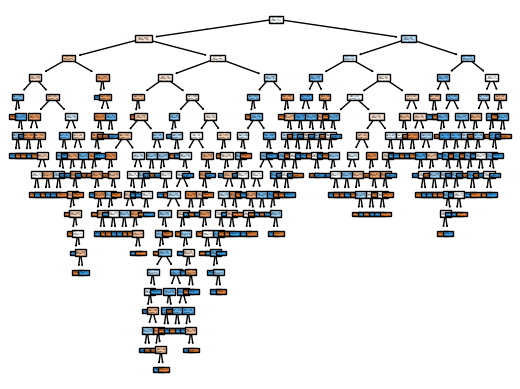

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the first tree in the forest
plot_tree(rf_model.estimators_[0], filled=True)
plt.show()

In [ ]:
best_model = logreg_model if logreg_accuracy > rf_accuracy else rf_model

In [ ]:
import pickle

with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print("Best model saved as 'best_model.pkl'")

Best model saved as 'best_model.pkl'


In [ ]:
df.drop(columns=['Application_ID', 'Job_Level'], inplace=True)